![jupyter](./tasks/task3.png)
![jupyter](./tasks/task3-var-1.png)
![jupyter](./tasks/task3-var-2.png)

In [81]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable
from scipy.stats import chi2

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)
    
n = 120

$Плотность \spaceи\space функция\space распределения \spaceхи-квадрат\space$

![jupyter](./pictures/p_chi2.png)
![jupyter](./pictures/F_chi2.png)

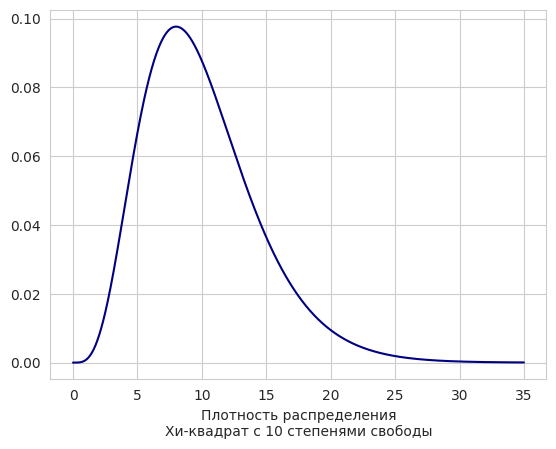

In [82]:
x = np.arange(0, 35, 0.001)
p_chi2 = chi2.pdf(x, df=10)
F = chi2.cdf(x, df=10)

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='navy')
plt.xlabel('Плотность распределения\nХи-квадрат с 10 степенями свободы')
plt.show()

In [111]:
Y = np.array([])
for i in range(n):
    Y = np.append(Y, random.random())

    
print("Моделируем массив из 120 случайных чисел:\n", Y)
print("")

print("Итерируемся по смоделированному массиву и формируем новый,\nэлементами которого будут значения обратной функции распредления(встроенная функция в матпакет)\nхи-квадрат в точках смоделированного массива\n")
    
X = np.array([])
for i in range(n):
    X = np.append(X, chi2.ppf(Y[i], df=10))
print("Полученный массив X =")
print(X)

Моделируем массив из 120 случайных чисел:
 [0.821 0.268 0.63  0.356 0.671 0.395 0.994 0.317 0.153 0.21  0.668 0.122
 0.099 0.396 0.536 0.233 0.546 0.211 0.084 0.842 0.534 0.783 0.906 0.595
 0.059 0.328 0.199 0.33  0.654 0.001 0.402 0.014 0.266 0.932 0.514 0.478
 0.159 0.517 0.484 0.323 0.49  0.466 0.458 0.339 0.898 0.533 0.772 0.844
 0.871 0.872 0.853 0.443 0.825 0.077 0.565 0.97  0.153 0.374 0.94  0.625
 0.344 0.123 0.029 0.985 0.868 0.409 0.099 0.913 0.312 0.067 0.047 0.251
 0.656 0.413 0.558 0.521 0.462 0.585 0.351 0.608 0.447 0.984 0.414 0.042
 0.46  0.053 0.654 0.358 0.024 0.303 0.357 0.81  0.643 0.886 0.362 0.897
 0.446 0.335 0.543 0.85  0.537 0.773 0.575 0.924 0.656 0.55  0.492 0.669
 0.636 0.621 0.595 0.076 0.551 0.916 0.702 0.909 0.66  0.441 0.403 0.999]

Итерируемся по смоделированному массиву и формируем новый,
элементами которого будут значения обратной функции распредления(встроенная функция в матпакет)
хи-квадрат в точках смоделированного массива

Полученный массив X =
[1

In [112]:
Max = np.amax(X)
Min = np.amin(X)
w = Max - Min

print("Находим крайние члены вариационного ряда и размах выборки\n")
print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Находим крайние члены вариационного ряда и размах выборки

Размер n = 120
Крайние члены вариационного ряда max = 29.611, min = 1.46623
Размах выборки w = 28.144658


In [113]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Осуществляем группировку данных\n")

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(X, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Осуществляем группировку данных

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 4.020665


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            3.476559133719676            |                        16.0                        |
|            7.497224491021121            |                        45.0                        |
|            11.517889848322564           |                        34.0                        |
|            15.53855520562401            |                        19.0                        |
|            19.559220562925457           |                        2.0                         |
|             23.5798859202269            |                        3.0                         |
|            27.60055

По сгруппированным данным строим гистограмму относительных частот



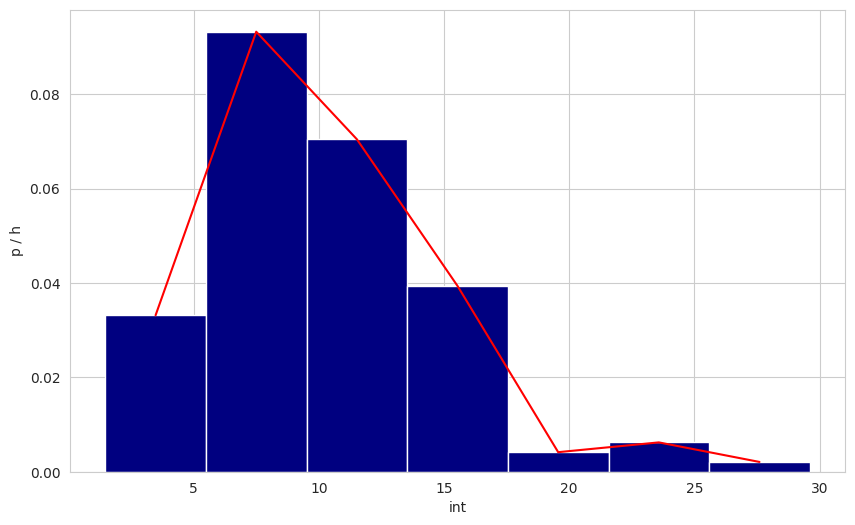

In [114]:
print("По сгруппированным данным строим гистограмму относительных частот\n")

sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.plot(xx, yy, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [115]:
print("Вычисляем выборочное среднее и выборочную дисперсию\n")

xm = sum(X) / n
s2 = sum((X[i] - xm) ** 2 for i in range(n)) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Вычисляем выборочное среднее и выборочную дисперсию

Выброчное среднее xm = 10.0818
Выборочная дисперсия s2 = 20.99794


Строим совмещенные графики гистограммы и плотности предполагаемого закона



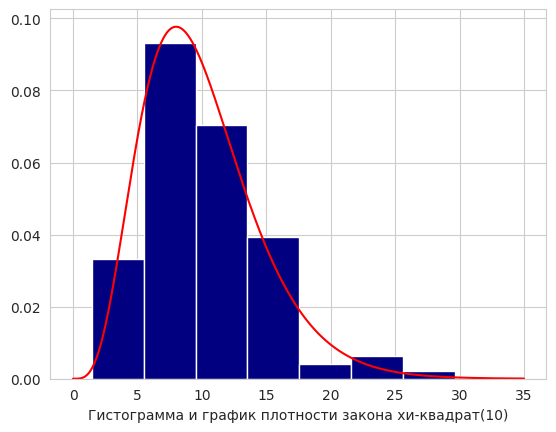

In [116]:
print("Строим совмещенные графики гистограммы и плотности предполагаемого закона\n")

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='red')
plt.xlabel('Гистограмма и график плотности закона хи-квадрат(10)')
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.show()

![jupyter](./pictures/E-chi2.png)
![jupyter](./pictures/Var-chi2.png)

In [117]:
th = ["Мат. ожидание (M)", "Эмпирическое среднее (xm)", "Сравнение(|M - xm| = 0)мало"]
td = np.array([10, round(xm, 5), abs(10 - xm)])
print_table(th, td)

th = ["Дисперсия (D)", "Выборочная дисперсия (s2)", "Сравнение(D / s2 = 1)дисперсии близки"]
td = np.array([20, round(s2, 5), 20 / s2])
print_table(th, td)

+-------------------+---------------------------+-----------------------------+
| Мат. ожидание (M) | Эмпирическое среднее (xm) | Сравнение(|M - xm| = 0)мало |
+-------------------+---------------------------+-----------------------------+
|        10.0       |          10.0818          |     0.08180491500890597     |
+-------------------+---------------------------+-----------------------------+
+---------------+---------------------------+---------------------------------------+
| Дисперсия (D) | Выборочная дисперсия (s2) | Сравнение(D / s2 = 1)дисперсии близки |
+---------------+---------------------------+---------------------------------------+
|      20.0     |          20.99794         |           0.9524742474574232          |
+---------------+---------------------------+---------------------------------------+


In [118]:
def funToArray(array, fun):
    arr = []
    for x in array:
        arr.append(fun(x))
    return arr

def ind(x):
    if (x > 0).any():
        return 1
    return 0

def Femp(z):
    result = 0
    for i in X:
        result += ind(z - i)
    result /= n
    return result
    
hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

def R(z):
    value = Femp(z) + eps 
    if value > 1:
        return 1
    else:
        return value

def L(z):
    value = Femp(z) - eps
    return Femp(z) - eps
    if value > 0:
        return value
    else:
        return 0

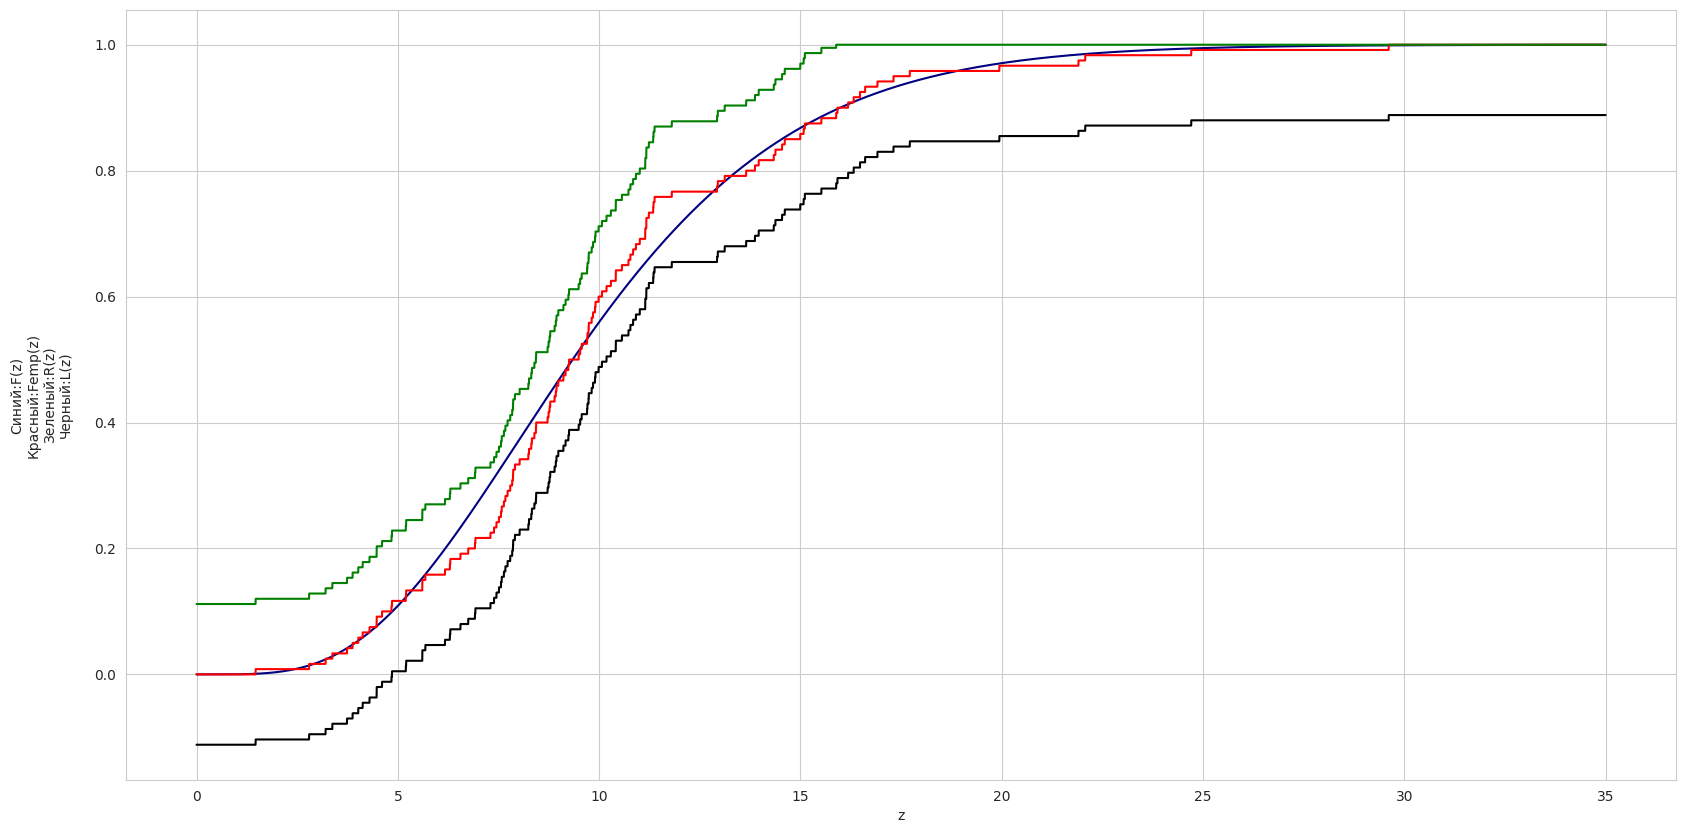

In [119]:
sb.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(x, F, color='navy')
plt.plot(x, funToArray(x, Femp), color='red')
plt.plot(x, funToArray(x, R), color='green')
plt.plot(x, funToArray(x, L), color='black')
plt.xlabel("z")
plt.ylabel("Синий:F(z)\nКрасный:Femp(z)\nЗеленый:R(z)\nЧерный:L(z)\n")
plt.show()

In [12]:
def ind(x):
    if (x > 0):
        return 1
    return 0

def Femp(x):
    res = []
    for x_i in x:
        res.append(sum(p[i] * ind(x_i - Int[i]) for i in range(l)))
    return res

hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

def R(x):
    res = []
    for fx in Femp(x):
        if fx + eps < 1:
            res.append(fx + eps)
        else: 
            res.append(1)
    return res

def L(x):
    res = []
    for fx in Femp(x):
        if fx - eps > 0:
            res.append(fx - eps)
        else: 
            res.append(0)
    return res